In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from skimage.feature import hog
from sklearn.neighbors import KNeighborsClassifier

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
# Define the path to the fruit images dataset
dataset_path = os.getcwd()+ "/Dataset/train"
# Define the list of fruit classes
fruit_names = os.listdir(dataset_path)
# MacOS cihazlardaki .DS_Store dosyası ignore edilir.
fruit_classes = [class_name for class_name in fruit_names if class_name != ".DS_Store"]

In [ ]:
# Load the fruit images and labels
images = []
labels = []
for fruit_class in fruit_classes:
    fruit_class_path = os.path.join(dataset_path, fruit_class)
    print(fruit_class)
    for image_file in os.listdir(fruit_class_path):
        image_path = os.path.join(fruit_class_path, image_file)
        image = cv2.imread(image_path)

        images.append(image)
        labels.append(fruit_classes.index(fruit_class))



black berry
bearberry
apricot
banana
orange


In [ ]:
def preprocess(images):
    final_images = []
    for image in images:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (64, 64))
        final_images.append(image)
    return final_images

In [ ]:
images = preprocess(images)

In [ ]:
# Convert the image and label lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)

In [ ]:
# Split the dataset into training and testing sets
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2)

HOG feature extraction is an important step in fruit classification project because it allows us to extract relevant information from the images that can be used for classification. HOG features describe the shape and texture of an object based on the distribution of gradient orientations in an image. By extracting HOG features from fruit images, we can create a representation of the image that captures the important visual characteristics of the fruit. 

In [ ]:
# Extract HOG features from the training set

hog_features = []
i = 0
for image in train_images:
    hog_feature = hog(image, orientations=8, pixels_per_cell=(8, 8), cells_per_block=(2, 2), feature_vector=True, multichannel=True, channel_axis=-1)
    hog_features.append(hog_feature)
    i = i + 1
train_features = np.array(hog_features)
i = 0
hog_features = []
for image in test_images:
    hog_feature = hog(image, orientations=8, pixels_per_cell=(8, 8), cells_per_block=(2, 2), feature_vector=True, multichannel=True, channel_axis=-1)
    hog_features.append(hog_feature)
    i = i + 1
test_features = np.array(hog_features)


/var/folders/ll/m4x7jzhn1sx67kdws1tf0zg80000gn/T/ipykernel_41100/1815871730.py:6: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  hog_feature = hog(image, orientations=8, pixels_per_cell=(8, 8), cells_per_block=(2, 2), feature_vector=True, multichannel=True, channel_axis=-1)
/var/folders/ll/m4x7jzhn1sx67kdws1tf0zg80000gn/T/ipykernel_41100/1815871730.py:13: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  hog_feature = hog(image, orientations=8, pixels_per_cell=(8, 8), cells_per_block=(2, 2), feature_vector=True, multichannel=True, channel_axis=-1)


SIFT stands for Scale Invariant Feature Transform, it is a feature extraction method where image content is transformed into local feature coordinates that are invariant to translation, scale and other image transformations.

In [ ]:
sift = cv2.xfeatures2d.SIFT_create()

train_features_sift = []
train_labels_sift = []  # etiketleri takip etmek için yeni bir liste
for i, image in enumerate(train_images):
    # Gri ölçeklendirme uygulanıyor çünkü sift renk değerlerine duyarsızdır
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    # Keypoint'ler ve descriptor'lar çıkarılıyor
    kp, des = sift.detectAndCompute(gray, None)
    # Eğer descriptor'lar varsa, train_features_sift listesine eklenirken, train_labels_sift listesine etiketleri ekleniyor
    if des is not None:
        train_features_sift.append(des)
        train_labels_sift += [train_labels[i]] * des.shape[0]  
        

train_features_sift = np.concatenate(train_features_sift, axis=0)

train_labels_sift = np.array(train_labels_sift)


assert train_features_sift.shape[0] == train_labels_sift.shape[0]

test_features_sift = []
test_labels_sift = []  
for i, image in enumerate(test_images):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    kp, des = sift.detectAndCompute(gray, None)
    if des is not None:
        test_features_sift.append(des)
        test_labels_sift += [train_labels[i]] * des.shape[0] 
test_features_sift = np.concatenate(test_features_sift, axis=0)

test_labels_sift = np.array(test_labels_sift)


In [ ]:
rfc = RandomForestClassifier(n_estimators=200, max_depth=40, random_state=42)
rfc.fit(train_features_sift, train_labels_sift)
y_pred_sift = rfc.predict(test_features_sift)
accuracy_sift = accuracy_score(test_labels_sift, y_pred_sift)
precision_sift = precision_score(test_labels_sift, y_pred_sift, average='macro')
recall_sift = recall_score(test_labels_sift, y_pred_sift, average='macro')
f1_sift = f1_score(test_labels_sift, y_pred_sift, average='macro')
print("Accuracy:", accuracy_sift)
print("Precision:", precision_sift)
print("Recall:", recall_sift)
print("F1 score:", f1_sift)

In [ ]:
clf = RandomForestClassifier(n_estimators=200, max_depth=40, random_state=42)
clf.fit(train_features, train_labels)
y_pred = clf.predict(test_features)
accuracy = accuracy_score(test_labels, y_pred)
precision = precision_score(test_labels, y_pred, average='macro')
recall = recall_score(test_labels, y_pred, average='macro')
f1 = f1_score(test_labels, y_pred, average='macro')
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

Accuracy: 0.6339370829361296
Precision: 0.6505513879178143
Recall: 0.621247867142604
F1 score: 0.627141308129835


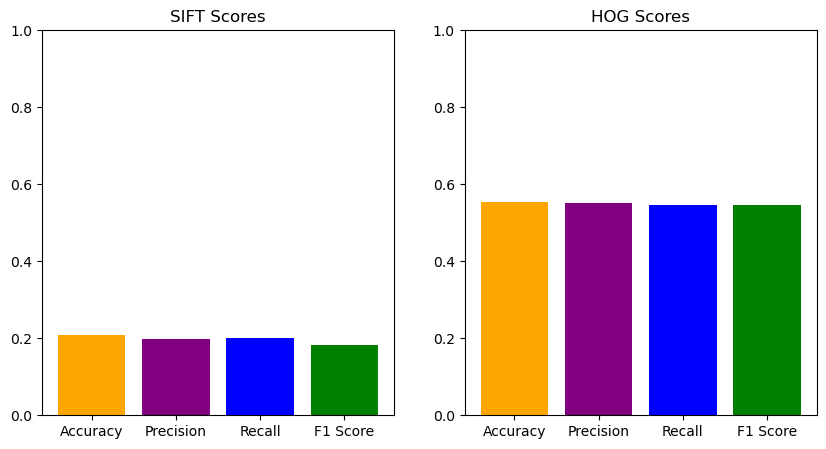

In [ ]:
import matplotlib.pyplot as plt

# SIFT Scores
sift_scores = [accuracy_sift, precision_sift, recall_sift, f1_sift]
sift_labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
# HOG Scores
hog_scores = [accuracy, precision, recall, f1]
hog_labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Create subplots for SIFT and HOG
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

# Plot SIFT scores
ax1.bar(sift_labels, sift_scores, color=['orange', 'purple', 'blue', 'green'])
ax1.set_title('SIFT Scores')
ax1.set_ylim(0, 1)

# Plot HOG scores
ax2.bar(hog_labels, hog_scores, color=['orange', 'purple', 'blue', 'green'])
ax2.set_title('HOG Scores')
ax2.set_ylim(0, 1)

plt.show()


The HOG filter divides an image into small parts and calculates the histogram of gradient directions for each part. These histograms are used to capture the distribution of edges and directions in an image. Therefore, the HOG filter is quite effective in defining the shapes and edges of fruits. On the other hand, the SIFT filter is used to detect feature points by scaling down an image at different scales, and it is less effective than the HOG filter in defining edges and shapes because some details are lost or incorrect matching may occur during the scaling of feature points. For these reasons, the HOG filter has yielded better results in visual recognition problems such as fruit classification.

In [ ]:
# K-Nearest Neighbors Classifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(train_features, train_labels)
y_pred_knn = knn.predict(test_features)
accuracy_knn = accuracy_score(test_labels, y_pred_knn)
precision_knn = precision_score(test_labels, y_pred_knn, average='macro')
recall_knn = recall_score(test_labels, y_pred_knn, average='macro')
f1_knn = f1_score(test_labels, y_pred_knn, average='macro')
print("\nK-Nearest Neighbors Classifier:")
print("Accuracy:", accuracy_knn)
print("Precision:", precision_knn)
print("Recall:", recall_knn)
print("F1 score:", f1_knn)


K-Nearest Neighbors Classifier:
Accuracy: 0.4223069590085796
Precision: 0.6282034581672153
Recall: 0.41714061922482976
F1 score: 0.4022461013181922


In [ ]:
# Train the SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(train_features, train_labels)
# Make predictions on the test set
predictions = svm_model.predict(test_features)
# Evaluate the model performance
accuracy_svm = accuracy_score(test_labels, predictions)
precision_svm = precision_score(test_labels, predictions, average='macro')
recall_svm = recall_score(test_labels, predictions, average='macro')
f1_svm = f1_score(test_labels, predictions, average='macro')
print("Accuracy:", accuracy_svm)
print("Precision:", precision_svm)
print("Recall:", recall_svm)
print("F1 score:", f1_svm)

Accuracy: 0.5548141086749285
Precision: 0.550912626577813
Recall: 0.5468382825751246
F1 score: 0.5472232598855489


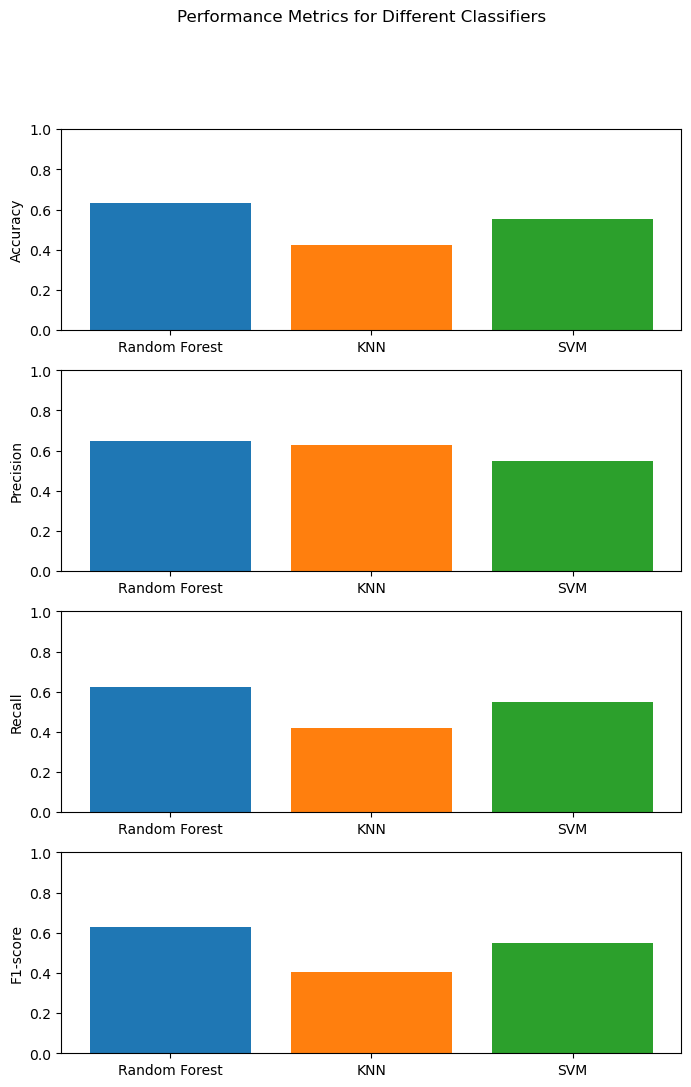

In [ ]:
import matplotlib.pyplot as plt

# Accuracy, precision, recall and f1-score values for different classifiers
values = [[accuracy, precision, recall, f1], 
          [accuracy_knn, precision_knn, recall_knn, f1_knn], 
          [accuracy_svm, precision_svm, recall_svm, f1_svm]]

# Labels for classifiers and metrics
classifiers = ['Random Forest', 'KNN', 'SVM']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']

# Create subplots for each metric
fig, axs = plt.subplots(nrows=len(metrics), figsize=(8, 12))

# Plot each metric for each classifier
for i in range(len(metrics)):
    for j in range(len(classifiers)):
        axs[i].bar(classifiers[j], values[j][i])
        axs[i].set_ylabel(metrics[i])
        axs[i].set_ylim(0, 1)

# Set title for the figure
fig.suptitle('Performance Metrics for Different Classifiers')

# Show the figure
plt.show()


When comparing classification models such as Random Forest, K-Nearest Neighbors, and SVM for this fruit classification project, it can be seen that Random Forest provides the best results. This is due to the nature of the feature vectors used in the project, which are based on the density and distribution of features, and Random Forest has a more suitable model to capture these features. Additionally, Random Forest is more resilient to noise in the dataset and generally performs better. Although K-Nearest Neighbors and SVM models also provided good results, it was observed that these models are more sensitive to the dimensionality of the feature vectors. SVM, especially performs better with high-dimensional feature vectors, while K-Nearest Neighbors shows better performance with lower-dimensional feature vectors.

In [ ]:
print(classification_report(test_labels, predictions, target_names=fruit_classes))

              precision    recall  f1-score   support

 black berry       0.57      0.58      0.58       231
   bearberry       0.49      0.57      0.53       200
     apricot       0.51      0.53      0.52       216
      banana       0.71      0.60      0.65       250
      orange       0.47      0.45      0.46       152

    accuracy                           0.55      1049
   macro avg       0.55      0.55      0.55      1049
weighted avg       0.56      0.55      0.56      1049



In [ ]:
import numpy as np
import os
from PIL import Image
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from skimage.filters import gabor_kernel
import scipy
from scipy import signal

# Define the path to the dataset
data_dir = os.getcwd()+"/Dataset/train/"
classes = os.listdir(data_dir)

# Load the data
X = []
y = []
for i, fruit in enumerate(classes):
    fruit_dir = os.path.join(data_dir, fruit)
    if fruit_dir.__contains__("DS"):
        print(fruit_dir)
        i = i - 1
        continue
    for filename in os.listdir(fruit_dir):
        img_path = os.path.join(fruit_dir, filename)
        img = Image.open(img_path).convert('L') # Grayscale conversion
        img = img.resize((32, 32), resample=Image.BILINEAR)
        
        # Extract Gabor filter features
        filters = []
        for theta in range(4):
            theta = theta / 4. * np.pi
            for sigma in (1, 3):
                kernel = np.real(gabor_kernel(0.5 / np.pi, theta=theta, sigma_x=sigma, sigma_y=sigma))
                filters.append(kernel)
        
        features = np.zeros((len(filters), 2), dtype=np.double)
        for a, kernel in enumerate(filters):
            filtered = np.real(signal.convolve2d(img, kernel, mode='same', boundary='symm'))
            features[a, 0] = filtered.mean()
            features[a, 1] = filtered.var()
        X.append(features.flatten())
        y.append(i)

# Convert the data to the correct format for the classifier
X = np.array(X)
y = np.array(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a random forest classifier
clf = RandomForestClassifier(n_estimators=150, max_depth=20, random_state=55)
clf.fit(X_train, y_train)

# Test the classifier on the testing set
y_pred = clf.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
